In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
FPATH = "/home/ielis/data/threes-simulations/output-all/ranks.tsv"
df = pd.read_csv(FPATH, sep="\t")
df.head()

,CASE,WITH_SPLICING,WITHOUT_SPLICING,PATHOMECHANISM
0,Fan-2013-TAZ,1,1,splicing|5css|activated
1,Piluso-2009-CASK,7,4,splicing|SRE
2,Auclair-2006-MSH2,1,1,splicing|5css|activated
3,Yamaguchi-2017-MLH1,1,1,splicing|5css|activated
4,Martel-2012-CYBB,1,1,splicing|5ss|disrupted


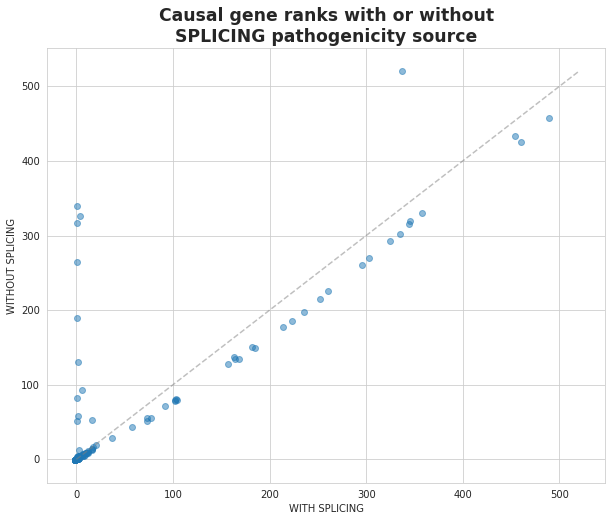

In [3]:
fig, ax = plt.subplots(figsize=(10, 8))

max_val = max([df.WITH_SPLICING.max(), df.WITHOUT_SPLICING.max()])
line_points = np.linspace(0, max_val, 10)
line = ax.plot(line_points, line_points, "--", color="grey", alpha=0.5)
sct = ax.scatter(df.WITH_SPLICING, df.WITHOUT_SPLICING, alpha=0.5)
#xlim = ax.set_xlim([0, 50])
#ylim = ax.set_ylim([0, 50])

xl = ax.set_xlabel("WITH SPLICING")
yl = ax.set_ylabel("WITHOUT SPLICING")
title = ax.set_title("Causal gene ranks with or without\nSPLICING pathogenicity source",
                     size="xx-large", fontweight="bold")

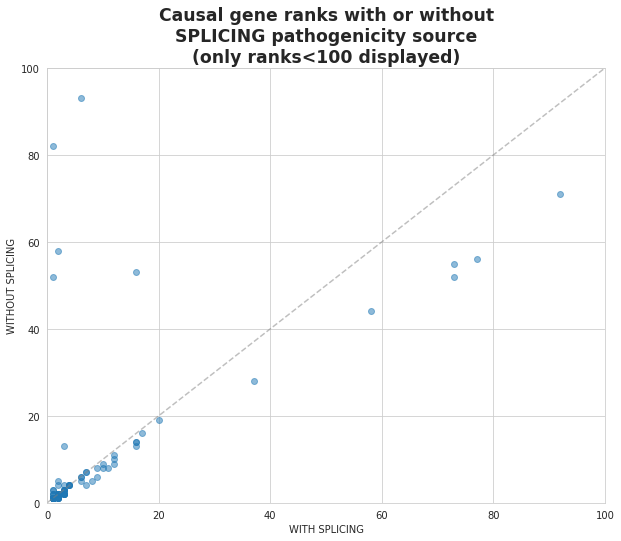

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))

line_points = np.linspace(0, 280, 10)
line = ax.plot(line_points, line_points, "--", color="grey", alpha=0.5)
sct = ax.scatter(df.WITH_SPLICING, df.WITHOUT_SPLICING, alpha=0.5)
xlim = ax.set_xlim([0, 100])
ylim = ax.set_ylim([0, 100])

xl = ax.set_xlabel("WITH SPLICING")
yl = ax.set_ylabel("WITHOUT SPLICING")
title = ax.set_title("Causal gene ranks with or without\nSPLICING pathogenicity source\n(only ranks<100 displayed)",
                     size="xx-large", fontweight="bold")

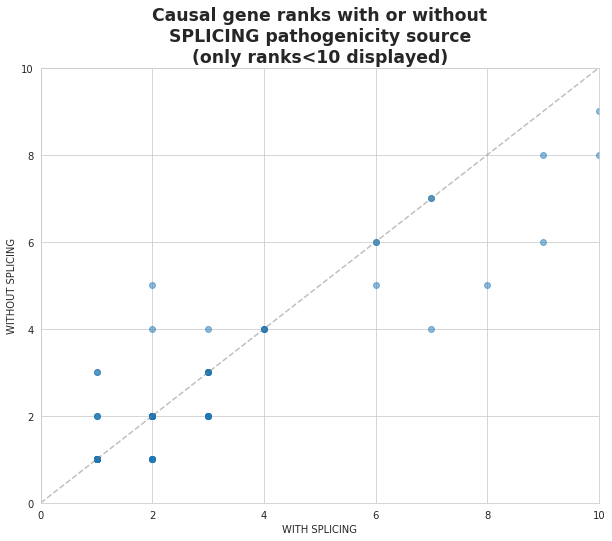

In [5]:
fig, ax = plt.subplots(figsize=(10, 8))

line_points = np.linspace(0, 280, 10)
line = ax.plot(line_points, line_points, "--", color="grey", alpha=0.5)
sct = ax.scatter(df.WITH_SPLICING, df.WITHOUT_SPLICING, alpha=0.5)
xlim = ax.set_xlim([0, 10])
ylim = ax.set_ylim([0, 10])

xl = ax.set_xlabel("WITH SPLICING")
yl = ax.set_ylabel("WITHOUT SPLICING")
title = ax.set_title("Causal gene ranks with or without\nSPLICING pathogenicity source\n(only ranks<10 displayed)",
                     size="xx-large", fontweight="bold")

## Cases where Exomiser performed better with Splicing score than without the score

In [6]:
df.loc[df.WITH_SPLICING < df.WITHOUT_SPLICING, :]

,CASE,WITH_SPLICING,WITHOUT_SPLICING,PATHOMECHANISM
16,Kajihara-1995-G6PC,1,3,splicing|3css|activated
17,Costantini-2011-GCK,1,339,splicing|5css|activated
25,Willoughby-2018-WDR45,16,53,splicing|3css|activated
27,Wang-2018-ATP7B,337,521,splicing|SRE|ESS|binding|increased
35,Koppolu-2017-COL6A1,2,58,splicing|5ss|disrupted
43,Ward-2016-SERPINF1,1,3,splicing|3ss|disrupted
47,Torrado-2018-FBN1,1,190,splicing|3css|activated
52,Covaciu-2011-COL7A1,1,52,splicing|SRE
85,Carboni-2011-LMNA,4,326,splicing|3ss|disrupted
95,Agrebi-2017-FAS,1,2,splicing|branchpoint|disrupted
